In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
df = sns.load_dataset('titanic')

In [3]:
x = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = df['survived']

In [4]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [5]:
x = pd.get_dummies(x, columns=['sex']) # label encoding 


In [6]:
df.isnull().sum() / len(df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [7]:
x.age.fillna( value = x['age'].mean() , inplace = True)

In [8]:
x_train,x_test, y_train, y_test = train_test_split(x,y ,  test_size = 0.2)

In [9]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [10]:
y_pred = model.predict(x_test)

In [11]:
print("accuraccy :" , accuracy_score(y_test,y_pred))

accuraccy : 0.7821229050279329


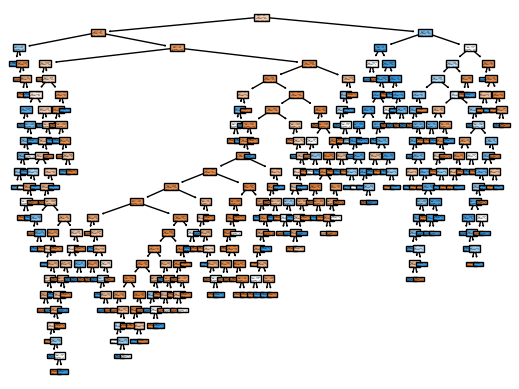

<Figure size 640x480 with 0 Axes>

In [12]:
tree.plot_tree(model.fit(x,y) , filled = True)
plt.show()
plt.savefig("tree.png")

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_test, y_pred)  

0.7142857142857143

In [14]:
recall_score(y_test, y_pred) 

0.8

In [15]:
f1_score(y_test, y_pred) 

0.7547169811320756

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

<Axes: >

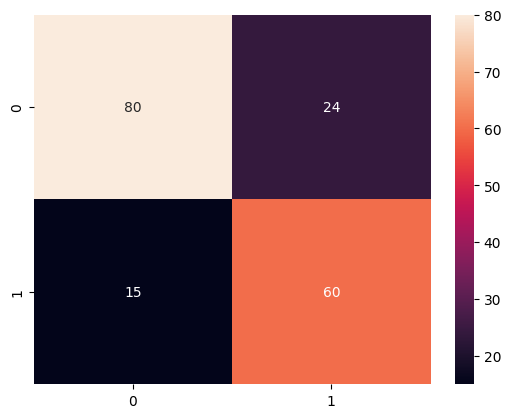

In [17]:
sns.heatmap(cm, annot=True, fmt='d')

# knn neighbours

In [18]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)    # n-neighbours ko change kr k check krna is called hyper parameter tunning..
# hyper parameter accuracy ko change krta ha.
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[87, 17],
       [35, 40]], dtype=int64)

<Axes: >

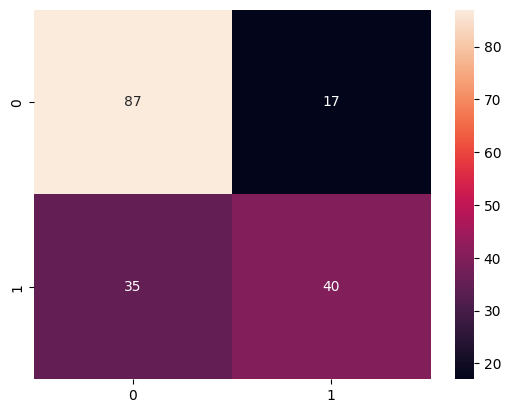

In [19]:
sns.heatmap(cm, annot=True, fmt='d')

In [20]:
precision_score(y_test, y_pred) 

0.7017543859649122

In [21]:
recall_score(y_test, y_pred) 

0.5333333333333333

In [22]:
f1_score(y_test, y_pred) 

0.6060606060606061

# random _forest classification

multiple trees and conclusion is based on all knn trees accuracy
sara data ensamble hota hy phr conclusion

In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()    # n-neighbours ko change kr k che
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)


print("confusion matrix score: " ,  cm)
print("precision score: " ,precision_score(y_test, y_pred))
print("recall score: " ,recall_score(y_test, y_pred))
print("f1_score: " , f1_score(y_test, y_pred))


confusion matrix score:  [[86 18]
 [18 57]]
precision score:  0.76
recall score:  0.76
f1_score:  0.76


# logistic regression.
used for classification
sigmoiod function = pura dataset ko binary classification ma convert krta hy
output classification ma dega

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()   # n-neighbours ko change kr k che
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)


print("confusion matrix score: " ,  cm)
print("precision score: " ,precision_score(y_test, y_pred))
print("recall score: " ,recall_score(y_test, y_pred))
print("f1_score: " , f1_score(y_test, y_pred))

confusion matrix score:  [[92 12]
 [17 58]]
precision score:  0.8285714285714286
recall score:  0.7733333333333333
f1_score:  0.7999999999999999


c:\Users\khawar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# SVM = support vector machine
draws hyperplane on which things will be classified.

In [25]:
from sklearn.svm import SVC
model = SVC()    # n-neighbours ko change kr k che
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)


print("confusion matrix score: " ,  cm)
print("precision score: " ,precision_score(y_test, y_pred))
print("recall score: " ,recall_score(y_test, y_pred))
print("f1_score: " , f1_score(y_test, y_pred))

confusion matrix score:  [[97  7]
 [54 21]]
precision score:  0.75
recall score:  0.28
f1_score:  0.4077669902912622


# Naive _ Bayes model


In [26]:
from sklearn.naive_bayes import GaussianNB
model =  GaussianNB()   # n-neighbours ko change kr k che
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)


print("confusion matrix score: " ,  cm)
print("precision score: " ,precision_score(y_test, y_pred))
print("recall score: " ,recall_score(y_test, y_pred))
print("f1_score: " , f1_score(y_test, y_pred))

confusion matrix score:  [[93 11]
 [19 56]]
precision score:  0.835820895522388
recall score:  0.7466666666666667
f1_score:  0.7887323943661971


In [40]:
import numpy as np
from sklearn.model_selection import train_test_split , cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# define models to be evaluated.
models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), SVC()]
names = ["Logistic Regression", "KNN", "RANDOM FOREST", "SVM"]

# perform k-fld cross validation for each model:

K = 10
for name, model in zip(names, models):
    f1_scores = cross_val_score(model, X, y, cv=K, scoring="f1")
    mean_f1_score = np.mean(f1_scores)
    print(f"{name}: Mean F1-score = {mean_f1_score:.3f}")

c:\Users\khawar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\khawar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

f {name} CV accuraccy : {np.mean(cv_scores): ,3f} +/- {np.std(cv_scores): ,3f} 


In [29]:
from  sklearn.model_selection import GridSearchCV

# define the parameter grid
param_grid = {'C' : [0.1,1,10],
              'kernel': ['linear', 'rbf'],
               'gamma' : [0.1,1,10]}

grid_search = GridSearchCV(SVC(), param_grid, cv =5)
grid_search.fit(x_train, y_train)

print("best parameters : {}".format(grid_search.best_params_))
print("Best cross validation score : {:.2f}".format(grid_search.best_score_))



best parameters : {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Best cross validation score : 0.78


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# define models to be evaluated.
models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), SVC()]
names = ["Logistic Regression", "KNN", "RANDOM FOREST", "SVM"]

# perform k-fld cross validation for each model:

K= 10
for name, model in zip(names, models):
    f1_scores = cross_val_score(model, x, y, cv=K, scoring="f1")
    mean_f1_score = np.mean(f1_scores)
    print(f"{name}: Mean F1-score = {mean_f1_score:.3f}")
        

c:\Users\khawar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\khawar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Logistic Regression: Mean F1-score = 0.719
KNN: Mean F1-score = 0.620
RANDOM FOREST: Mean F1-score = 0.742
SVM: Mean F1-score = 0.419
